In [1]:
from __future__ import absolute_import,division,print_function

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
print(tf.__version__)

2.0.0-alpha0


In [5]:
fash=keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels)=fash.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','sneaker','bag','ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

In [13]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

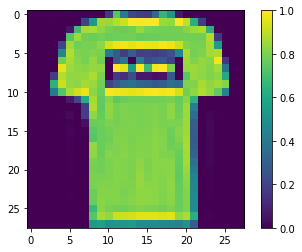

In [23]:
plt.figure()
plt.imshow(train_images[1])
#plt.yticks([])
#plt.xticks([])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images=train_images/255.0
test_images=test_images/255.0

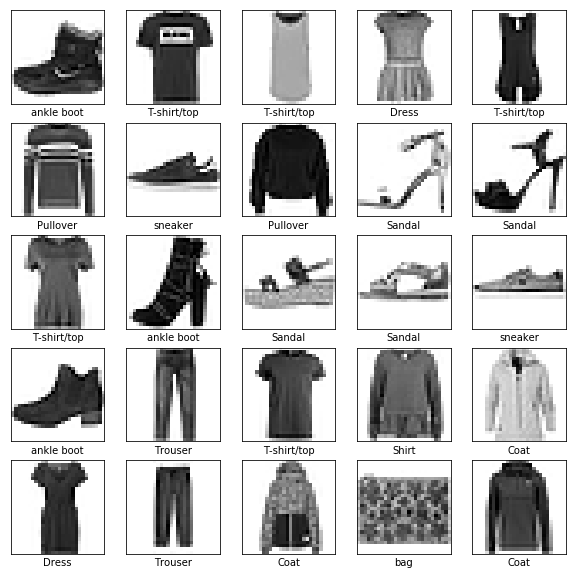

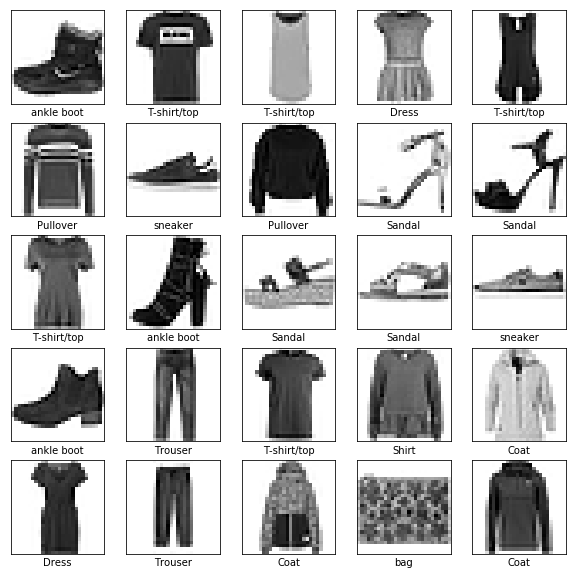

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [28]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2681 - accuracy: 0.9009
Epoch 2/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2557 - accuracy: 0.9046
Epoch 3/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2473 - accuracy: 0.9070
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2399 - accuracy: 0.9100
Epoch 5/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2316 - accuracy: 0.9137
Epoch 6/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2234 - accuracy: 0.9163
Epoch 7/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2166 - accuracy: 0.9193
Epoch 8/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2119 - accuracy: 0.9209
Epoch 9/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2049 - accuracy: 0.9233
Epoch 10/10
60000/60000 [=====

In [32]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.3363 - accuracy: 0.8873
test accuracy: 0.8873


In [33]:
pred=model.predict(test_images)

In [34]:
pred[0]
#A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. 

array([1.8775149e-08, 9.0727317e-13, 5.3516491e-10, 5.9725020e-12,
       3.1720357e-10, 5.4699336e-05, 1.4889380e-08, 1.8625294e-03,
       3.4002767e-09, 9.9808276e-01], dtype=float32)

In [35]:
np.argmax(pred[0])

9

In [38]:
def plot_image(i,pred_arr,true_label,img):
    pred_arr,true_label,img=pred_arr[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    pred_label=np.argmax(pred_arr)
    if pred_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],100*np.max(pred_arr),class_names[true_label]),color=color)
    
    ##thisplot[pred_label].set_color('red')
    ##thisplot[true_label].set_color('blue')

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,test_labels)
plt.show()

NameError: name 'plot_value_array' is not defined